# Underfitting and Overfitting in Ml

Overfitting and underfitting are the most common problem in Machine Learning.
-  **Overfitting** is the  situation where model generlise well in the training data set but fails to generlise to unseen data(testing data set).In Machine learning Lingo this problem is called **high variance**.It occurs when you give too much attributes(feature), then model will be puzzled and results in the overfitting.
    -  The process of making a simpler model reduces overfitting.In Machine learning term it is called **Generlisation** or  a better **hyperparameter** tunning could solve the problem
    

-  **Underfitting** is the situation where model does not do well in training data set.In machine learnig lingo this is the situation of **high bias**.This condition occurs when we try to  take too simple model.

We can check whether the model is underfitting or overfitting by the following way
-  **model score** for a good fit, training score should be slightly greater than validation score.
-  **MSE(mean sqaure error)** :- if the MSE of the model on the test data is substantially higher than the MSE obtained on the the training data , this is a sign of overfitting.It is based on euclidian distance norm.
-  **MAE(mean absolute error)**:- it is also used to check the accuracy of the model which is based on Manhattan distance norm.I will used MAE to illustate overfitting problem which can be solved with  hyperparameter tunning. 
 


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
pd.reset_option('^display.', silent=True)

In [3]:
# i am loading melbourne data set to illustrate this
df=pd.read_csv('melb_data.csv')
df.head(3)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0


In [4]:
df.shape # shape of data set

(13580, 21)

In [5]:
df.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

In [6]:
# columns with the missing value
[col for col in df.columns if df[col].isna().any()]

['Car', 'BuildingArea', 'YearBuilt', 'CouncilArea']

In [7]:
df.isna().sum() # to check null values

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [8]:
cat_columns=[col for col in df.columns if df[col].dtype=='O']  # categoricals columns in data set
cat_columns

['Suburb',
 'Address',
 'Type',
 'Method',
 'SellerG',
 'Date',
 'CouncilArea',
 'Regionname']

In [9]:
df.apply(lambda x:len(x.unique()))  # to see unique element in each columns

Suburb             314
Address          13378
Rooms                9
Type                 3
Price             2204
Method               5
SellerG            268
Date                58
Distance           202
Postcode           198
Bedroom2            12
Bathroom             9
Car                 12
Landsize          1448
BuildingArea       603
YearBuilt          145
CouncilArea         34
Lattitude         6503
Longtitude        7063
Regionname           8
Propertycount      311
dtype: int64

In [10]:
con_columns=[col for col in df.columns if df[col].dtype!='O'] # numerical columns
con_columns

['Rooms',
 'Price',
 'Distance',
 'Postcode',
 'Bedroom2',
 'Bathroom',
 'Car',
 'Landsize',
 'BuildingArea',
 'YearBuilt',
 'Lattitude',
 'Longtitude',
 'Propertycount']

In [11]:
df=df.dropna(axis=0) # dropping rows with na values

In [12]:
# for this i am using only this columns
my_col=['Rooms', 'Bathroom', 'Landsize', 'BuildingArea', 
                        'YearBuilt', 'Lattitude', 'Longtitude']

In [13]:
X=df[my_col]  #independent feature
y=df.Price  # dependent feature

In [14]:
from sklearn.model_selection import train_test_split

# split data into training and validation data, for both features and target
train_X, test_X, train_y,test_y = train_test_split(X, y,random_state = 0,test_size=0.2)

In [15]:
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor



here I am using DecisionTreeRegressor , how can changing the values in  max_leaf_nodes  can result in over fitting problems

# mean_absolute_error(it is based of  Manhattan distance norm)

In [27]:
# now we make a custome function that will calculate MAE
mae1=[]
def mae(leaf_nodes,train_X,test_X,train_y,test_y):
    model=DecisionTreeRegressor(max_leaf_nodes=leaf_nodes,random_state=0)
    model.fit(train_X,train_y)
    preds_val=model.predict(test_X)
    mae1.append(mean_absolute_error(test_y,preds_val))
    

In [28]:
for i in range(2,21):
    mae(i,train_X,test_X,train_y,test_y)
    

In [17]:
for i in range(2,21):
    print(f'max_leaf_nodes={i} , mean absolute error ={mae(i,train_X,test_X,train_y,test_y)}')

max_leaf_nodes=2 , mean absolute error =432983.02826149494
max_leaf_nodes=3 , mean absolute error =388294.7887033733
max_leaf_nodes=4 , mean absolute error =371685.4690141141
max_leaf_nodes=5 , mean absolute error =363932.3772588456
max_leaf_nodes=6 , mean absolute error =340772.89880111354
max_leaf_nodes=7 , mean absolute error =340247.97220730124
max_leaf_nodes=8 , mean absolute error =329128.29600809776
max_leaf_nodes=9 , mean absolute error =324924.27856486
max_leaf_nodes=10 , mean absolute error =312401.8271164357
max_leaf_nodes=11 , mean absolute error =308103.44174258615
max_leaf_nodes=12 , mean absolute error =307742.85706516675
max_leaf_nodes=13 , mean absolute error =304144.84177489276
max_leaf_nodes=14 , mean absolute error =293854.50418994896
max_leaf_nodes=15 , mean absolute error =288842.06144212006
max_leaf_nodes=16 , mean absolute error =286906.3747777113
max_leaf_nodes=17 , mean absolute error =283068.1343238229
max_leaf_nodes=18 , mean absolute error =282594.902899756

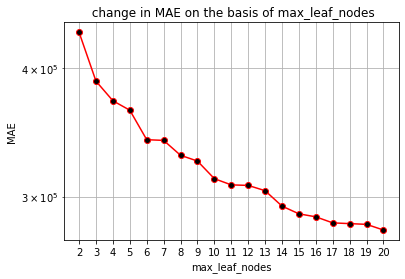

In [44]:
plt.plot(range(2,21),mae1,marker='o',mfc='black',color='red')
plt.xticks(range(2,21))
plt.yscale('log')
plt.grid(True,which="both")
plt.ylabel('MAE')
plt.xlabel('max_leaf_nodes')
plt.title(' change in MAE on the basis of max_leaf_nodes');

# Mean squared Error(it is based on  euclidian distance norm)

In [18]:
from sklearn.metrics import mean_squared_error

In [38]:
mse1=[]
def mse(leaf_nodes,train_X,test_X,train_y,test_y):
    model=DecisionTreeRegressor(max_leaf_nodes=leaf_nodes,random_state=0)
    model.fit(train_X,train_y)
    preds_val=model.predict(test_X)
    mse1.append(mean_squared_error(test_y,preds_val))
    

In [20]:
for i in range(2,21):
    print(f'max_leaf_nodes={i} , mean square error ={mse(i,train_X,test_X,train_y,test_y)}')

max_leaf_nodes=2 , mean square error =430909205150.11615
max_leaf_nodes=3 , mean square error =389657034320.64
max_leaf_nodes=4 , mean square error =355812711821.6914
max_leaf_nodes=5 , mean square error =339521478332.8786
max_leaf_nodes=6 , mean square error =320290429543.202
max_leaf_nodes=7 , mean square error =319202845965.6511
max_leaf_nodes=8 , mean square error =309470539769.45886
max_leaf_nodes=9 , mean square error =300543768042.1805
max_leaf_nodes=10 , mean square error =290409450019.03516
max_leaf_nodes=11 , mean square error =281867662619.7987
max_leaf_nodes=12 , mean square error =280808760641.4721
max_leaf_nodes=13 , mean square error =269921270058.87408
max_leaf_nodes=14 , mean square error =261111030352.98358
max_leaf_nodes=15 , mean square error =256482180917.62912
max_leaf_nodes=16 , mean square error =251807261865.17877
max_leaf_nodes=17 , mean square error =249442219669.5871
max_leaf_nodes=18 , mean square error =248555362279.40726
max_leaf_nodes=19 , mean square er

In [40]:
for i in range(2,21):
    mse(i,train_X,test_X,train_y,test_y)

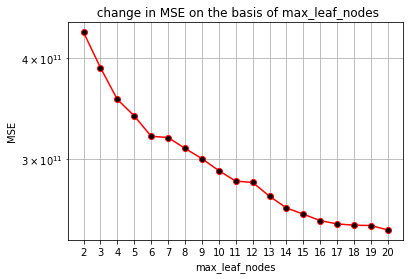

In [49]:
plt.plot(range(2,21),mse1,marker='o',mfc='black',color='red')
plt.xticks(range(2,21))
plt.yscale('log')
plt.grid(True,which="both")
plt.ylabel('MSE')
plt.xlabel('max_leaf_nodes')
plt.title(' change in MSE on the basis of max_leaf_nodes');

# Root mean squared( is just root of mean square error)

In [45]:
rms1=[]
def mse(leaf_nodes,train_X,test_X,train_y,test_y):
    model=DecisionTreeRegressor(max_leaf_nodes=leaf_nodes,random_state=0)
    model.fit(train_X,train_y)
    preds_val=model.predict(test_X)
    rms1.append(np.sqrt(mean_squared_error(test_y,preds_val)))
    

In [22]:
for i in range(2,21):
    print(f'max_leaf_nodes={i} ,root mean square error ={mse(i,train_X,test_X,train_y,test_y)}')

max_leaf_nodes=2 ,root mean square error =656436.7487809592
max_leaf_nodes=3 ,root mean square error =624225.147138947
max_leaf_nodes=4 ,root mean square error =596500.3871094229
max_leaf_nodes=5 ,root mean square error =582684.7160625363
max_leaf_nodes=6 ,root mean square error =565942.0726039036
max_leaf_nodes=7 ,root mean square error =564980.3943197066
max_leaf_nodes=8 ,root mean square error =556300.7637685381
max_leaf_nodes=9 ,root mean square error =548218.7228125108
max_leaf_nodes=10 ,root mean square error =538896.5114185052
max_leaf_nodes=11 ,root mean square error =530912.1044201184
max_leaf_nodes=12 ,root mean square error =529913.918142817
max_leaf_nodes=13 ,root mean square error =519539.4788260793
max_leaf_nodes=14 ,root mean square error =510990.24487066636
max_leaf_nodes=15 ,root mean square error =506440.6983227445
max_leaf_nodes=16 ,root mean square error =501804.0074223987
max_leaf_nodes=17 ,root mean square error =499441.9082031334
max_leaf_nodes=18 ,root mean squa

In [47]:
for i in range(2,21):
    mse(i,train_X,test_X,train_y,test_y)

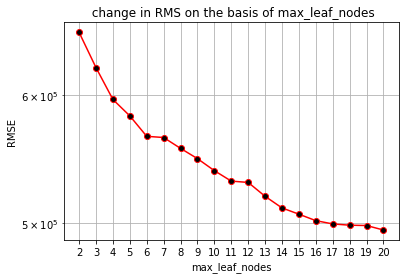

In [50]:
plt.plot(range(2,21),rms1,marker='o',mfc='black',color='red')
plt.xticks(range(2,21))
plt.yscale('log')
plt.grid(True,which="both")
plt.ylabel('RMSE')
plt.xlabel('max_leaf_nodes')
plt.title(' change in RMS on the basis of max_leaf_nodes');

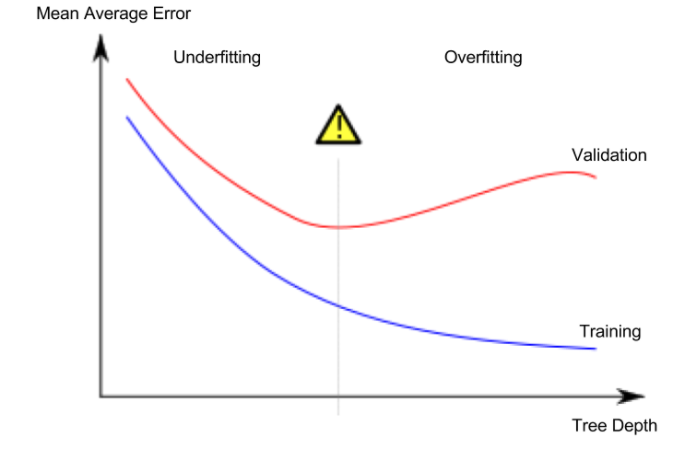

So, here i show how  the max_leaf_nodes argument provides a very sensible way to control overfitting vs underfitting. 
The more leaves we allow the model to make, 
the more we move from the underfitting area in the above graph to the overfitting area.